## Preprocessing

In [11]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
app_df = application_df.drop(labels=["EIN", "NAME"], axis=1)
app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [13]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
app_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [14]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_counts = app_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
replace_app = list(app_counts[app_counts < 450].index)
# Replace in dataframe
for app in replace_app:
    app_df["APPLICATION_TYPE"] = app_df["APPLICATION_TYPE"].replace(app, "Other")
    
# Check to make sure binning was successful
app_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2600        1
C2500        1
C1370        1
C1580        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

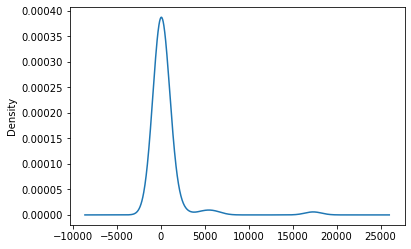

In [17]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_counts.plot.density()


In [18]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
replace = list(class_counts[class_counts < 1800].index)
# Replace in dataframe
for cls in replace:
    app_df['CLASSIFICATION'] = app_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
app_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [19]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
dummies_app_df = pd.get_dummies(app_df)

In [20]:
dummies_app_df.head(10)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,31452,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,1,7508025,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,1,94389,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = dummies_app_df["IS_SUCCESSFUL"].values
X = dummies_app_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model (reduce)

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 10
n2 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
n2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
n2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
n2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
n2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1760      
                                                                 
 dense_1 (Dense)             (None, 10)                410       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,181
Trainable params: 2,181
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
#  YOUR CODE GOES HERE
n2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = n2.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5783 - accuracy: 0.7145
Epoch 2/20
804/804 [==============================] - 1s 977us/step - loss: 0.5577 - accuracy: 0.7301
Epoch 3/20
804/804 [==============================] - 1s 986us/step - loss: 0.5543 - accuracy: 0.7316
Epoch 4/20
804/804 [==============================] - 1s 973us/step - loss: 0.5525 - accuracy: 0.7312
Epoch 5/20
804/804 [==============================] - 1s 987us/step - loss: 0.5511 - accuracy: 0.7321
Epoch 6/20
804/804 [==============================] - 1s 979us/step - loss: 0.5501 - accuracy: 0.7333
Epoch 7/20
804/804 [==============================] - 1s 988us/step - loss: 0.5490 - accuracy: 0.7334
Epoch 8/20
804/804 [==============================] - 1s 982us/step - loss: 0.5486 - accuracy: 0.7338
Epoch 9/20
804/804 [==============================] - 1s 987us/step - loss: 0.5485 - accuracy: 0.7337
Epoch 10/20
804/804 [==============================] - 1s 982us/step - loss: 0.5478 

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = n2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5531 - accuracy: 0.7261 - 188ms/epoch - 703us/step
Loss: 0.5530968904495239, Accuracy: 0.726064145565033


In [30]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
n2.save("AlphabetSoupCharity2(reduction).h5")

# 3rd Attempt (Increase)

In [27]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
n3 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
n3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
n3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
n3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
n3.summary()
# Compile the model
#  YOUR CODE GOES HERE
n3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Compile the model
#  YOUR CODE GOES HERE
n3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
#  YOUR CODE GOES HERE
fit_model = n3.fit(X_train_scaled,y_train,epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4400      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 9,501
Trainable params: 9,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5698 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7317
Epoch 4/100
8

804/804 [==============================] - 1s 986us/step - loss: 0.5363 - accuracy: 0.7390
Epoch 73/100
804/804 [==============================] - 1s 973us/step - loss: 0.5368 - accuracy: 0.7406
Epoch 74/100
804/804 [==============================] - 1s 984us/step - loss: 0.5364 - accuracy: 0.7409
Epoch 75/100
804/804 [==============================] - 1s 995us/step - loss: 0.5364 - accuracy: 0.7402
Epoch 76/100
804/804 [==============================] - 1s 990us/step - loss: 0.5363 - accuracy: 0.7409
Epoch 77/100
804/804 [==============================] - 1s 977us/step - loss: 0.5363 - accuracy: 0.7406
Epoch 78/100
804/804 [==============================] - 1s 980us/step - loss: 0.5362 - accuracy: 0.7402
Epoch 79/100
804/804 [==============================] - 1s 981us/step - loss: 0.5359 - accuracy: 0.7402
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7399
Epoch 81/100
804/804 [==============================] - 1s 975us/step - loss: 0

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = n3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5569 - accuracy: 0.7266 - 317ms/epoch - 1ms/step
Loss: 0.5568671822547913, Accuracy: 0.7266472578048706


In [29]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
n3.save("AlphabetSoupCharity3(increase).h5")

In [31]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 133
hidden_nodes_layer2 = 78
n4 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
n4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
n4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
n4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
n4.summary()
# Compile the model
#  YOUR CODE GOES HERE
n4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Compile the model
#  YOUR CODE GOES HERE
n4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
#  YOUR CODE GOES HERE
fit_model = n4.fit(X_train_scaled,y_train,epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 133)               5852      
                                                                 
 dense_7 (Dense)             (None, 78)                10452     
                                                                 
 dense_8 (Dense)             (None, 1)                 79        
                                                                 
Total params: 16,383
Trainable params: 16,383
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5698 - accuracy: 0.7234
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7307
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7297
Epoch 4/100

804/804 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7402
Epoch 74/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7410
Epoch 75/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.7420
Epoch 76/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7406
Epoch 77/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7411
Epoch 78/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7403
Epoch 79/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7406
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7407
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7401
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = n4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5599 - accuracy: 0.7254 - 176ms/epoch - 657us/step
Loss: 0.5599411129951477, Accuracy: 0.7253644466400146


In [34]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
n3.save("AlphabetSoupCharity4.h5")